# Импортируем нужные библиотеки

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt 
import requests
import math
from termcolor import colored as cl 
import numpy as np

#выбираем нужный нам стиль и разрмер графиков

In [23]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

#импортируем данные

In [25]:
df = pd.read_excel('C:/ЦМФ/Project-1. Algo-belikova-zvegincev/алго-стратегии/исходники/сток-даты/000078.xls').set_index('Index')
df.index = pd.to_datetime(df.index)
print(df.tail())

            name  code  open  high   low  close  volume     turnover  \
Index                                                                  
2022-10-14  海王生物    78  3.29  3.39  3.28   3.36  216836  72768295.00   
2022-10-17  海王生物    78  3.36  3.45  3.35   3.42  262503  89909325.00   
2022-10-18  海王生物    78  3.41  3.49  3.40   3.46  273829  94461977.59   
2022-10-19  海王生物    78  3.45  3.46  3.39   3.39  180291  61600009.98   
2022-10-20  海王生物    78  3.39  3.45  3.37   3.40  137665  46929110.62   

            turnover_rate  fqt  
Index                           
2022-10-14           0.83    1  
2022-10-17           1.00    1  
2022-10-18           1.04    1  
2022-10-19           0.69    1  
2022-10-20           0.53    1  


#Смотрим на общий тренд тикера

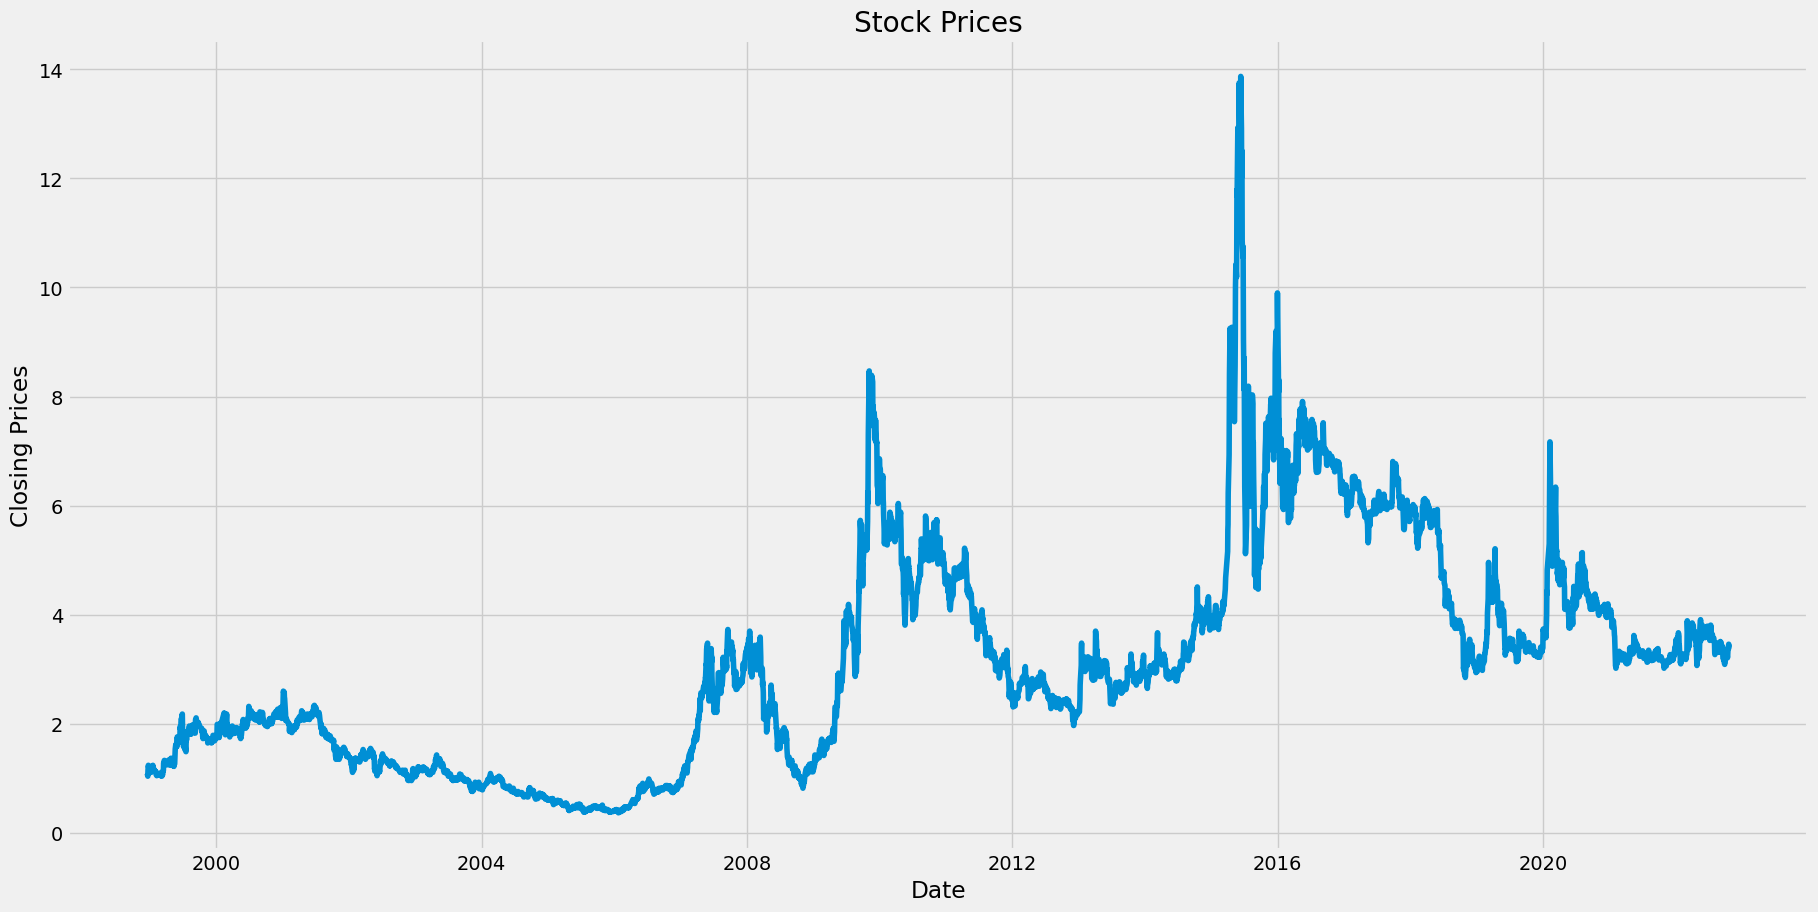

In [37]:
plt.plot(df.index, df['close'])
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title('Stock Prices')
plt.show()

# В данном ноутбуке будет описана стратегия торговле, основанная на концепции Полосы Боллинджера (Bolling Bolinger). Для написания данной стратегии нам портребуется стратегия SMA (скользаящее среднее)

#Функция вычисляющая SMA (как мы видим на графике ниже, sma является нечто сглажывающим между графиком цен закрытия тикера)

            name  code  open  high   low  close  volume     turnover  \
Index                                                                  
2022-10-14  海王生物    78  3.29  3.39  3.28   3.36  216836  72768295.00   
2022-10-17  海王生物    78  3.36  3.45  3.35   3.42  262503  89909325.00   
2022-10-18  海王生物    78  3.41  3.49  3.40   3.46  273829  94461977.59   
2022-10-19  海王生物    78  3.45  3.46  3.39   3.39  180291  61600009.98   
2022-10-20  海王生物    78  3.39  3.45  3.37   3.40  137665  46929110.62   

            turnover_rate  fqt  sma_20  
Index                                   
2022-10-14           0.83    1  3.2480  
2022-10-17           1.00    1  3.2480  
2022-10-18           1.04    1  3.2510  
2022-10-19           0.69    1  3.2495  
2022-10-20           0.53    1  3.2515  


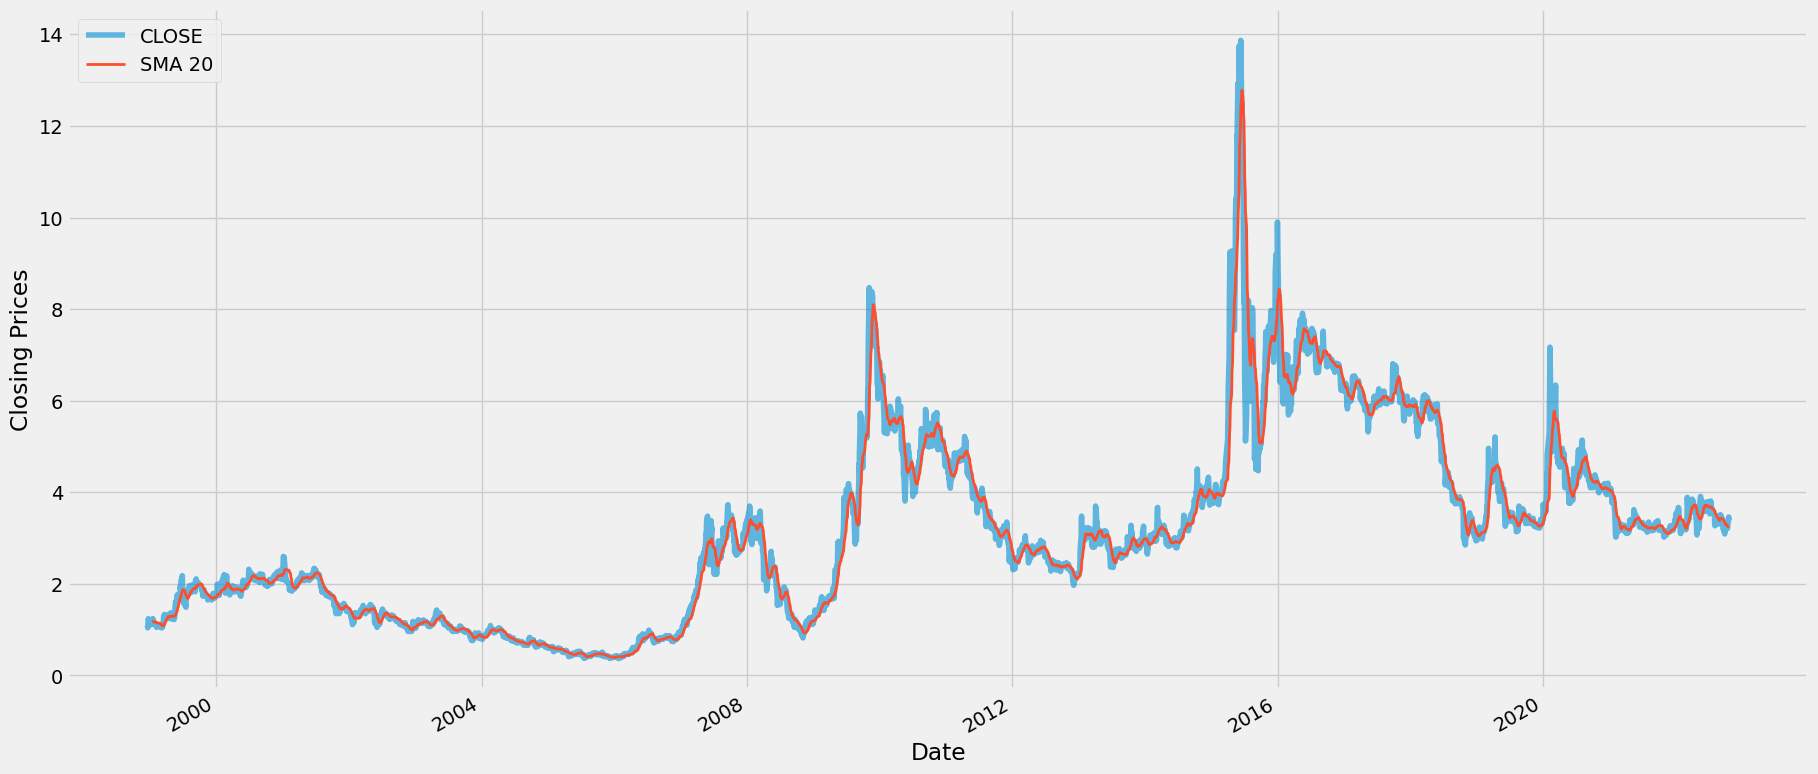

In [31]:
def sma(data, window):
    sma = data.rolling(window = window).mean()
    return sma

df['sma_20'] = sma(df['close'], 20)  #скользящее среднее последних 20 дней цен закрытия тикера
print(df.tail())

df['close'].plot(label = 'CLOSE', alpha = 0.6)
df['sma_20'].plot(label = 'SMA 20', linewidth = 2)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend(loc = 'upper left')
plt.show()

#Реализация функции полос Боллинджера (верхняя граница - это sma, смещенна на 2 фазы стандартного отклонения std; нижняя - аналогично, только смещяем на 2 фазы вниз относительно sma)

            name  code  open  high   low  close  volume     turnover  \
Index                                                                  
2022-10-14  海王生物    78  3.29  3.39  3.28   3.36  216836  72768295.00   
2022-10-17  海王生物    78  3.36  3.45  3.35   3.42  262503  89909325.00   
2022-10-18  海王生物    78  3.41  3.49  3.40   3.46  273829  94461977.59   
2022-10-19  海王生物    78  3.45  3.46  3.39   3.39  180291  61600009.98   
2022-10-20  海王生物    78  3.39  3.45  3.37   3.40  137665  46929110.62   

            turnover_rate  fqt  sma_20  upper_bb  lower_bb  
Index                                                       
2022-10-14           0.83    1  3.2480  3.440884  3.055116  
2022-10-17           1.00    1  3.2480  3.440884  3.055116  
2022-10-18           1.04    1  3.2510  3.455363  3.046637  
2022-10-19           0.69    1  3.2495  3.449023  3.049977  
2022-10-20           0.53    1  3.2515  3.456416  3.046584  


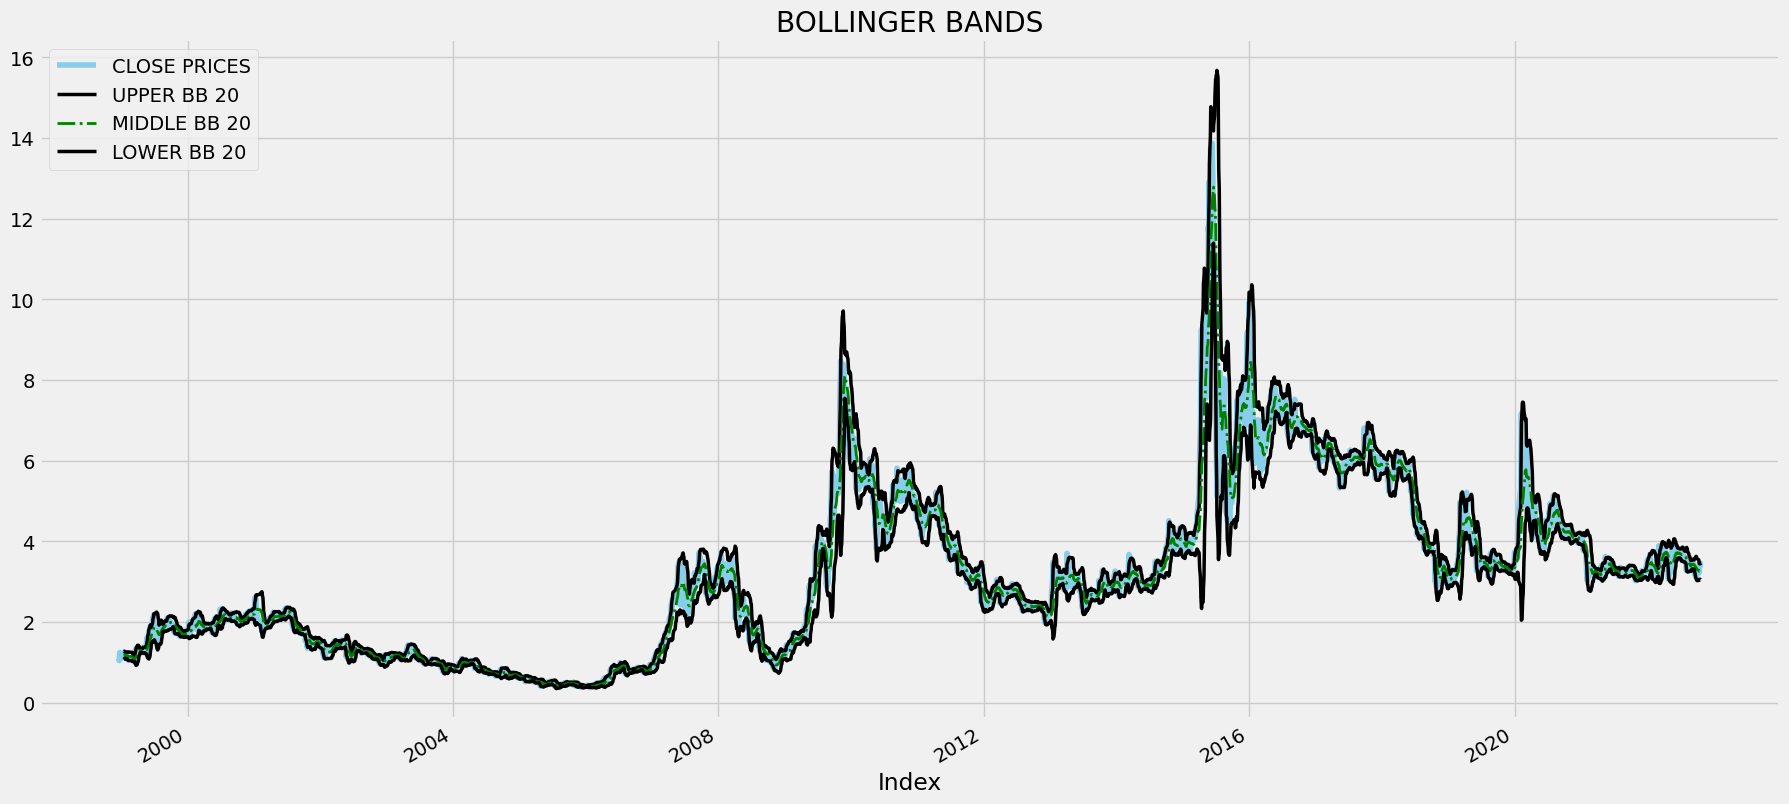

In [33]:
def bb(data, sma, window):
    std = data.rolling(window = window).std()  #среднеквадратичное отклонение
    upper_bb = sma + std * 2                   #верхняя граница полосы
    lower_bb = sma - std * 2                   #нижняя граница полосы
    return upper_bb, lower_bb 

df['upper_bb'], df['lower_bb'] = bb(df['close'], df['sma_20'], 20)  #аналогично считаем нашу стратегию Полосы Боллинджера (Bolling Bolinger)
print(df.tail())                                                            #также относительно промежутка 20 дней

df['close'].plot(label = 'CLOSE PRICES', color = 'skyblue')
df['upper_bb'].plot(label = 'UPPER BB 20', linestyle = '-', linewidth = 2.5, color = 'black')
df['sma_20'].plot(label = 'MIDDLE BB 20', linestyle = '-.', linewidth = 2, color = 'green')
df['lower_bb'].plot(label = 'LOWER BB 20', linestyle = '-', linewidth = 2.5, color = 'black')
plt.legend(loc = 'upper left')
plt.title('BOLLINGER BANDS')
plt.show()

# Создаем нашу стратегию на основе написанных ранее функции bb (ее суть будет заключаться в том, что когда график цен закрытия пересекает нижнюю границу Полосы Боллинджера - это сигнал для покупки, когда верхнюю - для закрытия. Приведенная ниже стратегия работает для открытия позиций только в лонг.

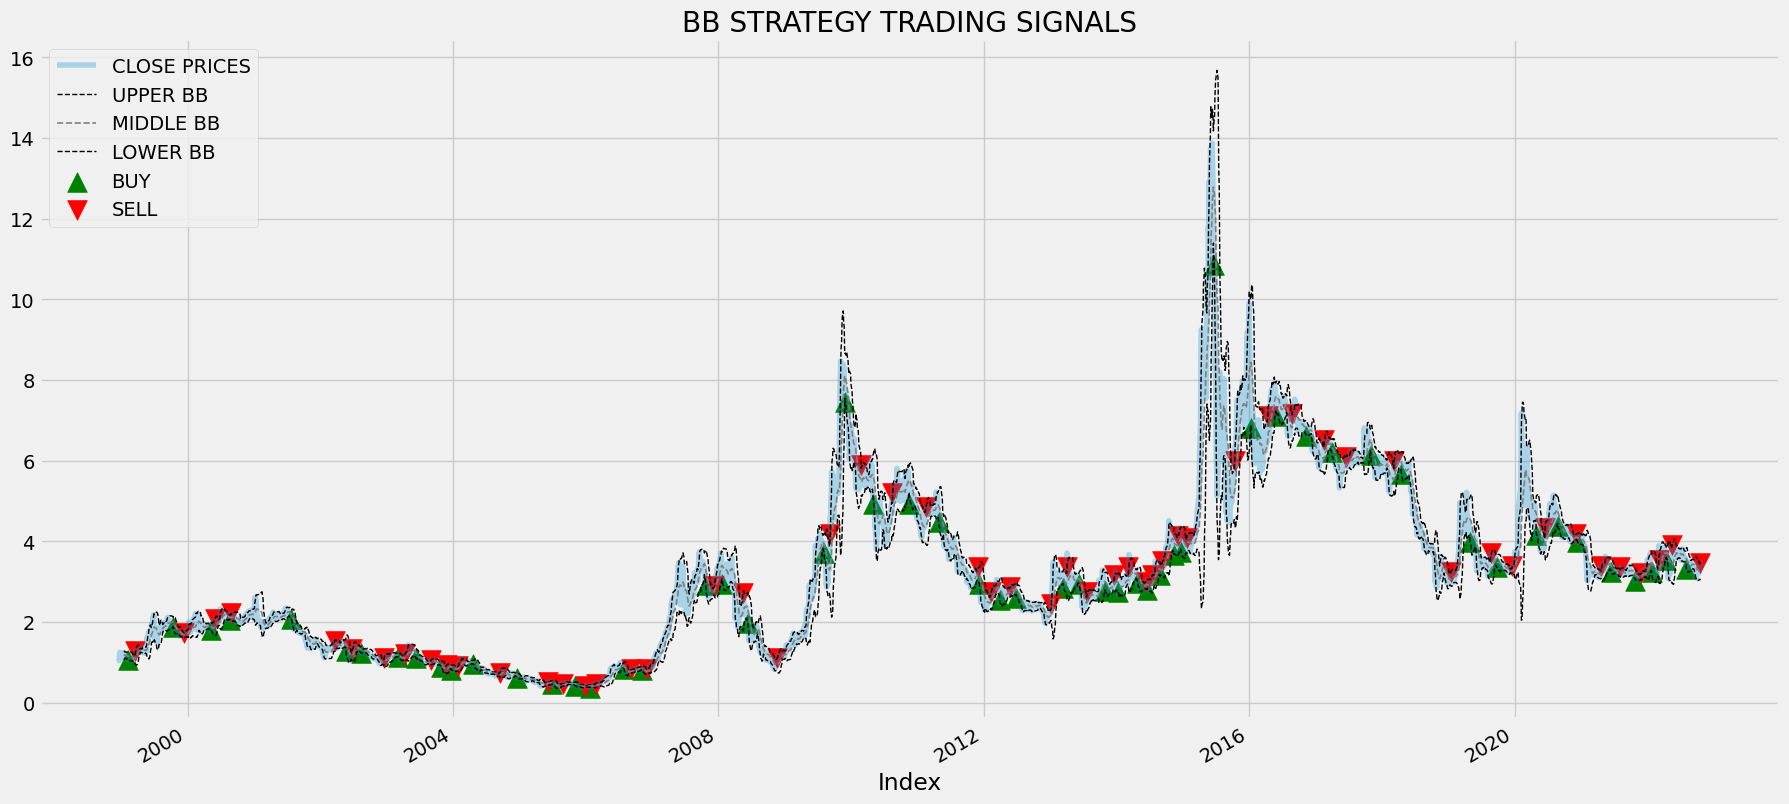

      close  upper_bb  lower_bb  bb_signal  bb_position
5664   3.23  3.472123  3.041877          0            1
5665   3.30  3.448521  3.051479          0            1
5666   3.36  3.440884  3.055116          0            1
5667   3.42  3.440884  3.055116          0            1
5668   3.46  3.455363  3.046637         -1            1
5669   3.39  3.449023  3.049977          0            1
5670   3.40  3.456416  3.046584          0            1
Profit gained from the BB strategy by investing $100k : 77350.93
Profit percentage of the BB strategy : 77%


In [36]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(df['close'], df['lower_bb'], df['upper_bb'])

df['close'].plot(label = 'CLOSE PRICES', alpha = 0.3)
df['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
df['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
df['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.show()

position = []
for i in range(len(bb_signal)):
    if bb_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(tsla['close'])):
    if bb_signal[i] == 1:
        position[i] = 1
    elif bb_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
upper_bb = df['upper_bb']
lower_bb = df['lower_bb']
close_price = df['close']
bb_signal = pd.DataFrame(bb_signal).rename(columns = {0:'bb_signal'}).set_index(df.index)
position = pd.DataFrame(position).rename(columns = {0:'bb_position'}).set_index(df.index)

frames = [close_price, upper_bb, lower_bb, bb_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)
strategy = strategy.reset_index().drop('Index', axis = 1)

print(strategy.tail(7))

df_ret = pd.DataFrame(np.diff(df['close'])).rename(columns = {0:'returns'})
bb_strategy_ret = []

for i in range(len(df_ret)):
    try:
        returns = df_ret['returns'][i]*strategy['bb_position'][i]
        bb_strategy_ret.append(returns)
    except:
        pass
    
bb_strategy_ret_df = pd.DataFrame(bb_strategy_ret).rename(columns = {0:'bb_returns'})

investment_value = 100000
number_of_stocks = math.floor(investment_value/df['close'][-1])
bb_investment_ret = []

for i in range(len(bb_strategy_ret_df['bb_returns'])):
    returns = number_of_stocks*bb_strategy_ret_df['bb_returns'][i]
    bb_investment_ret.append(returns)

bb_investment_ret_df = pd.DataFrame(bb_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(bb_investment_ret_df['investment_returns']), 2)
profit_percentage = math.floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the BB strategy by investing $100k : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the BB strategy : {}%'.format(profit_percentage), attrs = ['bold']))


# Итоги: индикатор Полосы Боллинджера — это трендовый индикатор, состоящий из трех линий: sma, sma+2std, sma-2std. Он помогает в определении зон перекупленности либо перепроданности, а также определить текущую рыночную волатильность.
Стратегия рабоатет лучше в периоды низкой волатильности, то есть когда расстояние между двумя границами Боллиндера является минимальным. В этот момент можно чаще всего открывать позицию, так как они будут совершаться при пробое цен.
К минусам данной стратегии можно отнести, например, когда цена приближается к граничной линии, возможно не только её отражение, но и расширение полосы.
В заключении, хотя большинство проверенных тикеров имеют положительную прибыль, но есть также и тикеры, которые дают довольно большой минус, например, 平安银行 (файл 00001). Но тем не менее, как базовая стратегия, данная концепция имеет место быть, которую в дальнейшем можно доработать, например, попробовать совместить данную стратегию с индикатором RSI.